In [ ]:
IBM-Attrition

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Berikut adalah data fictional dari IBM tentang kemungkinan karyawan untuk keluar.

Dari Employee-Attrition.csv, ambilah feature berikut:  
['Age','Department','DistanceFromHome','Gender','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','YearsSinceLastPromotion','WorkLifeBalance','Attrition']

1. Lakukan EDA untuk melihat faktor-faktor apa saja yang mempengaruhi mundurnya karyawan dari perusahaan.

2. Buatlah model Machine Learning untuk memprediksi apakah seseorang akan mundur/tidak.  
>* Seperti apa proses preprocessing yang anda lakukan? Jelaskan langkah-langkah yang kalian ambil!
>* Perhatikan bahwa data anda merupakan data imbalance, apa yang bisa anda lakukan untuk meningkatkan performa model anda?
>* Evaluation metric apa yg anda pakai jika anda ingin mencegah peningkatan attrition pada perusahaan anda? Jelaskan alasan anda.
>* Pilihlah model Machine Learning yang sesuai dengan data anda. Jangan lupa, lakukan hyperparameter tunning untuk meningkatkan performa model anda. Simpanlah model terbaik anda dengan menggunakan pickle/joblib!

In [15]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Employee-Attrition.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df=df[['Age','Department','DistanceFromHome','Gender','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','YearsSinceLastPromotion','WorkLifeBalance','Attrition']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   DistanceFromHome          1470 non-null   int64 
 3   Gender                    1470 non-null   object
 4   HourlyRate                1470 non-null   int64 
 5   JobInvolvement            1470 non-null   int64 
 6   JobSatisfaction           1470 non-null   int64 
 7   MaritalStatus             1470 non-null   object
 8   OverTime                  1470 non-null   object
 9   PercentSalaryHike         1470 non-null   int64 
 10  PerformanceRating         1470 non-null   int64 
 11  RelationshipSatisfaction  1470 non-null   int64 
 12  TotalWorkingYears         1470 non-null   int64 
 13  YearsSinceLastPromotion   1470 non-null   int64 
 14  WorkLifeBalance         

In [6]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.head()

,Age,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,41,Sales,1,Female,94,3,4,Single,Yes,11,3,1,8,0,1,Yes
1,49,Research & Development,8,Male,61,2,2,Married,No,23,4,4,10,1,3,No
2,37,Research & Development,2,Male,92,2,3,Single,Yes,15,3,2,7,0,3,Yes
3,33,Research & Development,3,Female,56,3,3,Married,Yes,11,3,3,8,3,3,No
4,27,Research & Development,2,Male,40,3,2,Married,No,12,3,4,6,2,3,No


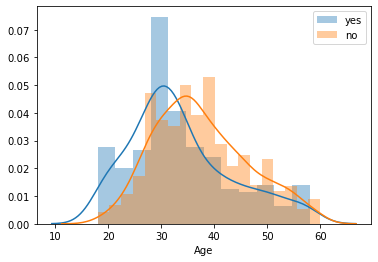

In [16]:
sns.distplot(df[df['Attrition']=='Yes']['Age'],label='yes')
sns.distplot(df[df['Attrition']=='No']['Age'],label='no')
plt.legend()

Younger people tend to leave the company more than older people, but the difference might be negiglible.

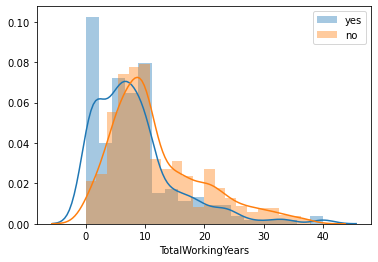

In [18]:
sns.distplot(df[df['Attrition']=='Yes']['TotalWorkingYears'],label='yes')
sns.distplot(df[df['Attrition']=='No']['TotalWorkingYears'],label='no')
plt.legend()

New employees have the highest posibility of attrition

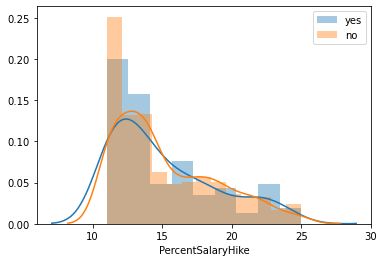

In [22]:
sns.distplot(df[df['Attrition']=='Yes']['PercentSalaryHike'],label='yes')
sns.distplot(df[df['Attrition']=='No']['PercentSalaryHike'],label='no')
plt.legend()

Salary increase doesn't relly affect attrition

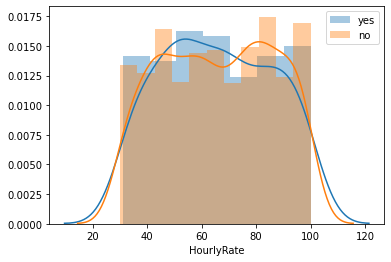

In [23]:
sns.distplot(df[df['Attrition']=='Yes']['HourlyRate'],label='yes')
sns.distplot(df[df['Attrition']=='No']['HourlyRate'],label='no')
plt.legend()

people with lower hourly rate tend to leave the company more

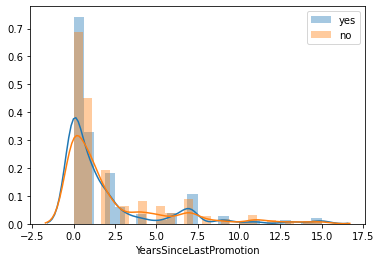

In [25]:
sns.distplot(df[df['Attrition']=='Yes']['YearsSinceLastPromotion'],label='yes')
sns.distplot(df[df['Attrition']=='No']['YearsSinceLastPromotion'],label='no')
plt.legend()

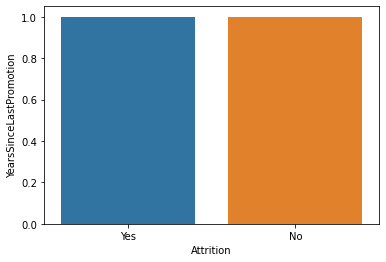

In [32]:
sns.barplot(y='YearsSinceLastPromotion', data=df, x= 'Attrition',estimator=np.median,ci=0)

years since promotion doesn't really affect atrrition

Sumarry:
features that affect attrition are:
* --
* --

Campany can do -- to reduce the attitrion

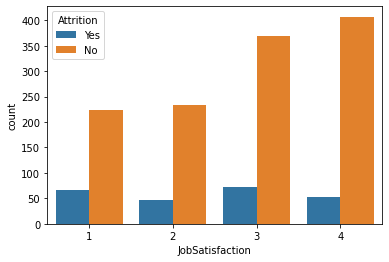

In [24]:
sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')

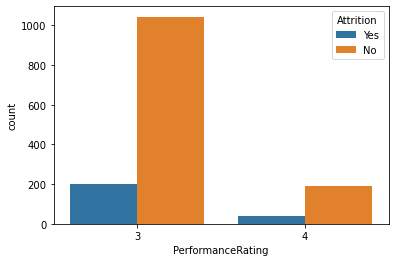

In [33]:
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')

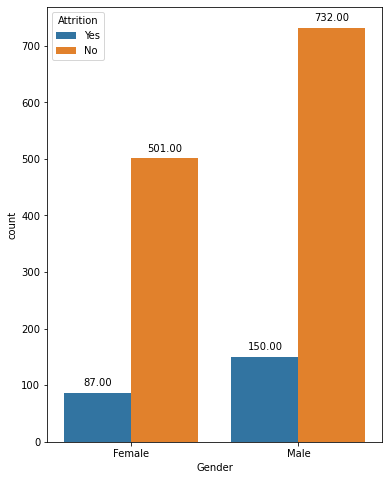

In [36]:

plt.figure(figsize=(6, 8))
splot = sns.countplot(x='Gender',data=df,hue='Attrition')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
Preprocess

In [37]:
# library untuk preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
df.head()

,Age,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,41,Sales,1,Female,94,3,4,Single,Yes,11,3,1,8,0,1,Yes
1,49,Research & Development,8,Male,61,2,2,Married,No,23,4,4,10,1,3,No
2,37,Research & Development,2,Male,92,2,3,Single,Yes,15,3,2,7,0,3,Yes
3,33,Research & Development,3,Female,56,3,3,Married,Yes,11,3,3,8,3,3,No
4,27,Research & Development,2,Male,40,3,2,Married,No,12,3,4,6,2,3,No


In [39]:
transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['Department','Gender','MaritalStatus','OverTime']),
], remainder='passthrough')

In [122]:
# test transformer

transformer.fit_transform(df)

array([[0.0, 1.0, 0.0, ..., 0, 1, 'Yes'],
       [1.0, 0.0, 1.0, ..., 1, 3, 'No'],
       [1.0, 0.0, 1.0, ..., 0, 3, 'Yes'],
       ...,
       [1.0, 0.0, 1.0, ..., 0, 3, 'No'],
       [0.0, 1.0, 1.0, ..., 0, 2, 'No'],
       [1.0, 0.0, 1.0, ..., 1, 4, 'No']], dtype=object)

one hot encoding, because they are all nominal category and the generated columns are not too many.

Splitting data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=df.drop('Attrition',axis=1)
y=[1 if i=='Yes' else 0 for i in df['Attrition']]

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    stratify=y,
    random_state=2020)

In [43]:
# benchmark

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report,recall_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

To avoid attrition, we use recall (minimize FN), but since the data is imbalance, i'll check again with classification report and precision recall curve.

In [45]:
def evaluate(df,model):

    model_name=[]
    recall_score=[]
    recall_std=[]
    for name, model in model:
        model = model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train,y_train,scoring='recall',cv=skfold).mean()
        std= cross_val_score(estimator,X_train,y_train,scoring='recall',cv=skfold).std()
        recall_score.append(score)
        recall_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'recall_score':recall_score, 'recall_std':recall_std})

In [88]:
models = [
    ['Log Regression', LogisticRegression(solver='liblinear')],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)]]

In [89]:
evaluate(df,models)

,Name,recall_score,recall_std
0,Log Regression,0.236842,0.083218
1,DecisionTree,0.347368,0.087438
2,RandomForest,0.173684,0.061378
3,KNeighbours,0.026316,0.016644


In [ ]:
Choose decision tree classifier

In [91]:
model=DecisionTreeClassifier()

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
recall_score(y_test,estimator.predict(X_test))

0.2127659574468085

In [93]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       247
           1       0.23      0.21      0.22        47

    accuracy                           0.76       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.75      0.76      0.76       294



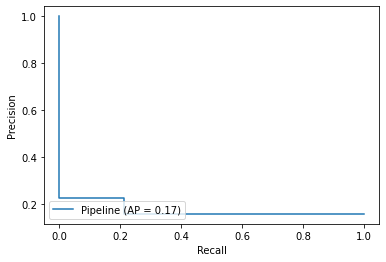

In [97]:
plot_precision_recall_curve(estimator,X_test,y_test)

In [98]:
# The dataset is imbalance, i'll try resampling to improve the model
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS

In [99]:
model=DecisionTreeClassifier()
under=NearMiss()
over=SMOTE()

estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])

skfold=StratifiedKFold(n_splits=5)

In [100]:
hyperparam_space={'balance':[over,under]}

In [101]:
grid_search= GridSearchCV(estimator,
    param_grid= hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='recall')

In [102]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Department',
                                                                          'Gender',
                                                                          'MaritalStatus',
                                                                          'OverTime'])])),
                                       ('balance', NearMiss()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1, param_grid={'balance': [SMOTE(), NearMiss()]},
             scoring='recall')

In [103]:
grid_search.best_score_

0.5947368421052632

In [104]:
grid_search.best_params_

{'balance': NearMiss()}

In [105]:
grid_search.best_estimator_.fit(X_train,y_train)
recall_score(y_test,grid_search.best_estimator_.predict(X_test))


0.6382978723404256

In [106]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64       247
           1       0.20      0.64      0.30        47

    accuracy                           0.52       294
   macro avg       0.54      0.57      0.47       294
weighted avg       0.77      0.52      0.58       294



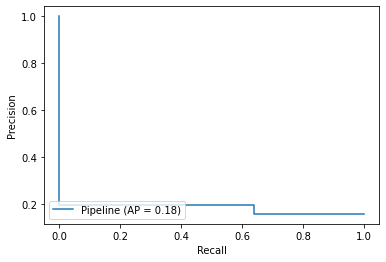

In [107]:
plot_precision_recall_curve(grid_search.best_estimator_,X_test,y_test)

In [58]:
# Tunnning

In [110]:
hyperparam_space = {
        'balance__n_neighbors': [2, 5, 10, 15, 20, 25, 30],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7,9,11],
        'model__criterion' : ['entropy','gini']}

In [111]:
estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='recall',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Department',
                                                                          'Gender',
                                                                          'MaritalStatus',
                                                                          'OverTime'])])),
                                       ('balance', NearMiss()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'balance__n_neighbors': [2, 5, 10, 15, 20, 25, 30],
 

In [113]:
grid.best_params_

{'balance__n_neighbors': 30,
 'model__criterion': 'entropy',
 'model__max_depth': 11,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 20}

In [114]:
grid.best_score_

0.7842105263157894

In [115]:
grid.best_estimator_.fit(X_train,y_train)
recall_score(y_test,grid.best_estimator_.predict(X_test))

0.7872340425531915

In [116]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48       247
           1       0.18      0.79      0.30        47

    accuracy                           0.40       294
   macro avg       0.54      0.56      0.39       294
weighted avg       0.78      0.40      0.45       294



In [ ]:
Before vs After Tunning

In [118]:
grid_search.fit(X_train,y_train)
recall_score(y_test,grid_search.best_estimator_.predict(X_test))


0.6382978723404256

In [120]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.51      0.65       247
           1       0.20      0.64      0.30        47

    accuracy                           0.53       294
   macro avg       0.54      0.57      0.47       294
weighted avg       0.77      0.53      0.59       294



In [119]:
grid.fit(X_train,y_train)
recall_score(y_test,grid.best_estimator_.predict(X_test))

0.7872340425531915

In [121]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48       247
           1       0.18      0.79      0.30        47

    accuracy                           0.40       294
   macro avg       0.54      0.56      0.39       294
weighted avg       0.78      0.40      0.45       294



increase model performance from recal 63% to 78%, tho the precision fall by 2 %

In [ ]:
# saving model

# import pickle
# grid.best_estimator_.fit(X,y)
# filename = 'model.sav'
# pickle.dump(grid.best_estimator_,open(filename,'wb'))